In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
# hack to get the path right
import sys
sys.path.append('..')

from ztf_maf.slicers import HealpixZTFSlicer
from ztf_maf.plots import ZTFBaseSkyMap

In [11]:
#slicer = HealpixZTFSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec')

# if we have no field overlaps (single pointing grid), a FieldSlicer will be faster
slicer = slicers.OpsimFieldSlicer()
# modify to use ZTF field shapes
slicer.plotFuncs = [ZTFBaseSkyMap, plots.OpsimHistogram]

metricList = []

m1 = metrics.IntraNightGapsMetric()
metricList.append(m1)
m2 = metrics.InterNightGapsMetric()
metricList.append(m2)
m3 = metrics.CountMetric(col='fieldRA')
metricList.append(m3)

filters = [4]

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

   
bDict={}
for i,metric in enumerate(metricList):

    for j, filt in enumerate(filters):
        sqlconstraint = "filter = '%s'"%(filt)

    
        bDict[sqlconstraint+metric.name] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                              summaryMetrics=summaryMetrics,plotDict={'radius': np.radians(3.689), 'fov_hwidth':3.5/2., 'fov_hlength':2.31/2.})

Querying database with constraint filter = '4'
Found 4993 visits
Running:  ["filter = '4'Median Inter-Night Gap", "filter = '4'Median Intra-Night Gap", "filter = '4'Count fieldRA"]
Completed metric generation.
Running reduce methods.
Running summary statistics.


/Users/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:91: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed.
Plotting figures with filter = '4' constraint now.
Plotting complete.


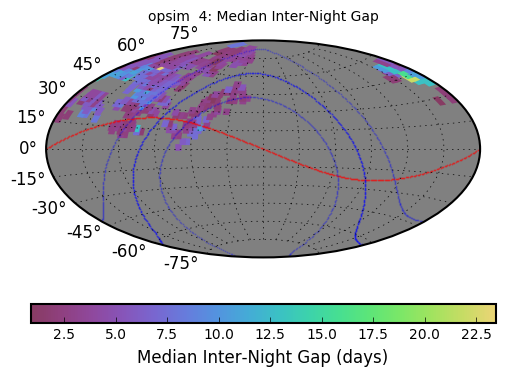

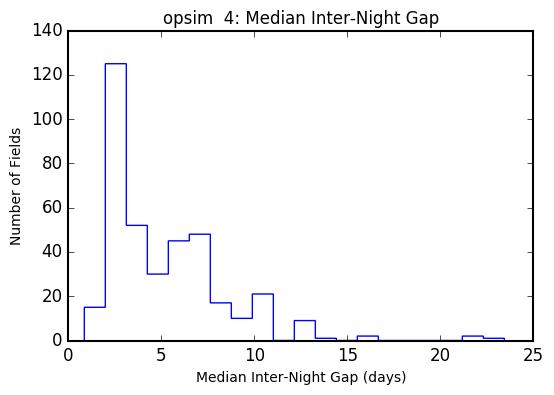

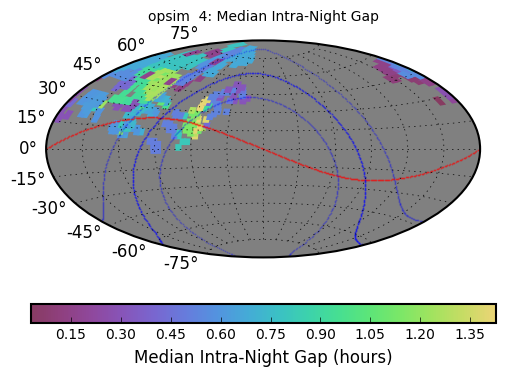

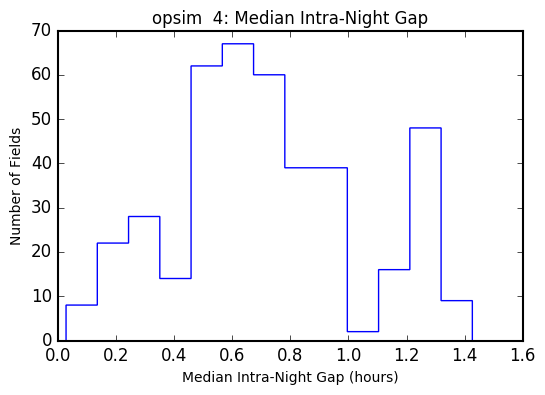

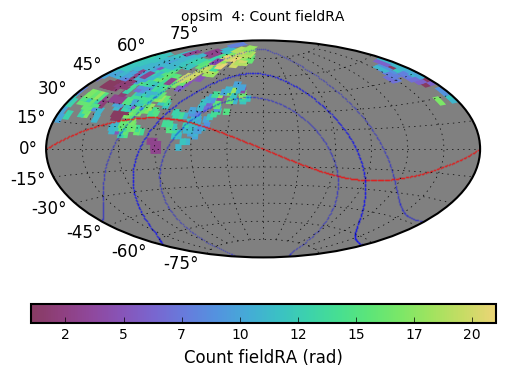

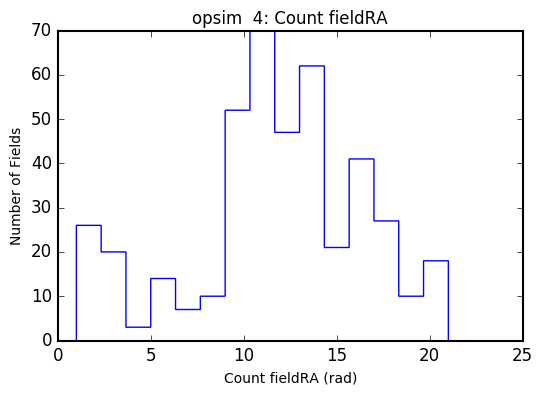

In [12]:
outDir = 'PTF_test'
ztfDB = db.OpsimDatabase('../data/ptf.db',
                        defaultdbTables={'Summary':['Summary','obsHistID']})
ztfDB.raColName = 'fieldRA'
ztfDB.decColName = 'fieldDec'

resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, ztfDB, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [13]:
for key in sorted(bDict):
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print key, bDict[key].summaryValues

propID = '1'Count fieldRA {'25th%ile': 38.0, 'Rms': 82.333984867768834, '75th%ile': 169.0, 'Min': 3.0, 'Max': 464.0, 'Median': 97.0, 'Mean': 109.54020007410152}
propID = '1'Median Inter-Night Gap {'25th%ile': 1.0158035499989637, 'Rms': 0.93400845735822302, '75th%ile': 1.0677166000023135, 'Min': 0.04923189999681199, 'Max': 9.4534082499994838, 'Median': 1.0224312999998801, 'Mean': 1.3312316558683353}
propID = '1'Median Intra-Night Gap {'25th%ile': 0.011112000094726682, 'Rms': 0.05724338156047782, '75th%ile': 0.011112000094726682, 'Min': 0.011109599901828915, 'Max': 0.6926615999545902, 'Median': 0.011112000094726682, 'Mean': 0.017894185501147852}
propID = '2'Count fieldRA {'25th%ile': 30.0, 'Rms': 21.048755416512282, '75th%ile': 62.0, 'Min': 1.0, 'Max': 149.0, 'Median': 46.0, 'Mean': 45.220394843129021}
propID = '2'Median Inter-Night Gap {'25th%ile': 7.8554564499972912, 'Rms': 11.153999218905909, '75th%ile': 10.893798900004185, 'Min': 1.9775873999969917, 'Max': 172.33776840000064, 'Median